## 1. 데이터 로드하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 살펴보기
### 데이터의 일반정보
### 데이터의 통계량
### 데이터의 shape

In [2]:
df = pd.read_csv('/Users/sejinmoon/Desktop/Coding/Bluemoon/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
print(df.shape)
print(df.describe())
print(df.info())

(400, 26)
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   

## 3. 데이터의 전처리
### 결측치가 전체의 30% 이상인 경우 해당 열을 제거하시오.
### 결측치가 전체의 30% 미만인 경우, 평균값으로 대체하시오.

In [4]:
#행렬 값을 저장해 놓고 활용하기 위함
row, col = df.shape

In [5]:
#어떤 열의 빈 값이 몇 개인지를 알아보는 함수
#해당 열의 공백 여부를 True, False로 인쇄함
#df['rbc'].isnull()

#해당 열의 공백이 총 몇 개인지
df['rbc'].isnull().sum()

152

In [6]:
empty = [x for x in df.columns if df[x].isnull().sum() >= row*0.3]

In [7]:
empty

['rbc', 'rc']

In [8]:
# 열 이름으로 특정 열을 제거
df.drop(columns = empty, inplace = True)

In [9]:
#rbc와 rc 열이 사라짐
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
#강사님 코드 1
mean_ = [x for x in df.columns if df[x].isnull().sum() < row*0.3 and df[x].isnull().sum() != 0]

In [11]:
#강사님 코드 2
mean_

['age',
 'bp',
 'sg',
 'al',
 'su',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [12]:
#원래 평균값 대체였으나, object의 경우 평균을 낼 수 없으므로 우선 최빈값으로 대체
for a in mean_:
    d_mode = df[a].mode()[0]
    df[a].fillna(d_mode, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  htn             400 non-null    obj

In [14]:
#평균 값으로 대체
# rc 열을 제외한 나머지 열의 결측치를 평균으로 대체
# for column in df.columns:
#     if df[column].dtype in [np.float64, np.int64]:
#         mean_value = df[column].mean()
#         df[column].fillna(mean_value, inplace=True)
        
# df

In [15]:
# df.info()

## 4. 데이터의 전처리 2
### 데이터의 dtype이 'obejct' 인 경우,
### 알맞은 인코딩을 수행하시오.

In [16]:
ob = [x for x in df.columns if df[x].dtype == 'object']

In [17]:
# categorical = [col for col in df.columns if df[col].dtype=='object']

In [18]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [19]:
#pcv라는 열에 \t? 혹은 \t가 포함된 값이 존재하여 object로 인식.
#해야 할 일 : \t가 들어간 값을 다른 숫자로 대체하고, 정수로 변환
df['pcv'].replace('\t43',0, inplace=True)
df['pcv'].replace('\t?',0, inplace=True)

In [20]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 0, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [21]:
df['pcv'] = df['pcv'].astype(int)
mean = df['pcv'].mean()
df['pcv'].replace(0, mean, inplace = True)

In [22]:
df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 41.  , 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  , 39.05, 52.  , 14.  , 22.  , 18.  , 42.  , 17.  ,
       46.  , 23.  , 19.  , 25.  , 26.  , 15.  , 21.  , 43.  , 20.  ,
       47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [23]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '\t6200', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '\t?',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [24]:
df['wc'].replace('\t6200',6200, inplace = True)
df['wc'].replace('\t8400',8400, inplace = True)
df['wc'].replace('\t?',0,inplace = True)

In [25]:
df['wc'] = df['wc'].astype(int)
d_mean = df['wc'].mean()
df['wc'].replace(0, d_mean, inplace = True)

In [26]:
df['wc'].unique()

array([ 7800,  6000,  7500,  6700,  7300,  9800,  6900,  9600, 12100,
        4500, 12200, 11000,  3800, 11400,  5300,  9200,  6200,  8300,
        8400, 10300,  9100,  7900,  6400,  8600, 18900, 21600,  4300,
        8500, 11300,  7200,  7700, 14600,  6300,  7100, 11800,  9400,
        5500,  5800, 13200, 12500,  5600,  7000, 11900, 10400, 10700,
       12700,  6800,  6500, 13600, 10200,  9000, 14900,  8200, 15200,
        5000, 16300, 12400, 10500,  4200,  4700, 10900,  8100,  9500,
        2200, 12800, 11200, 19100,  8751, 12300, 16700,  2600, 26400,
        8800,  7400,  4900,  8000, 12000, 15700,  4100,  5700, 11500,
        5400, 10800,  9900,  5200,  5900,  9300,  9700,  5100,  6600])

In [27]:
df.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,...,11.3,38.0,6000,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,11.2,32.0,6700,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300,no,no,no,good,no,no,ckd


In [28]:
Y = df['classification']

In [29]:
ob

['pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [30]:
# print(categorical)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    int64  
 17  htn             400 non-null    obj

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for o in ob:
    new_name = 'le'+o
    df[new_name] = le.fit_transform(df[o])
    df = pd.concat([df,df[new_name]], axis = 1)

In [33]:
df

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,lecad,lecad,leappet,leappet,lepe,lepe,leane,leane,leclassification,leclassification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1,1,0,0,0,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,...,1,1,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1,1,1,1,0,0,1,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,1,1,1,1,1,1,1,1,0,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,1,1,0,0,0,0,0,0,2,2
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1,1,0,0,0,0,0,0,2,2
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,1,1,0,0,0,0,0,0,2,2
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1,1,0,0,0,0,0,0,2,2


In [34]:
df.drop(columns = ob, inplace = True)

## 5. 데이터 준비하기
### train, test데이터를 7:3의 비율로 나누어보시오

In [35]:
from sklearn.model_selection import train_test_split

X = df
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

## 6. 최소 2개 이상의 모델링을 하여, 각 모델의 성능을 비교하시오.

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
y_predict = dt.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, y_predict)
print(acc)

0.9833333333333333


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 20, max_depth=3)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [40]:
predict = rf.predict(X_test)

acc = accuracy_score(Y_test, predict)
print(acc)

0.9833333333333333


In [41]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf') #linear
svc.fit(X_train,Y_train)

SVC()

In [42]:
predict = svc.predict(X_test)

acc = accuracy_score(Y_test, predict)
print(acc)

0.9666666666666667


## 시각화를 통해 데이터의 분포를 표현하시오(선택 1)

## 두 모델의 성능 지표를 시각화하여 표현하시오(선택 2)

In [47]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'lepc', 'lepc', 'lepcc', 'lepcc', 'leba', 'leba', 'lepcv',
       'lepcv', 'lewc', 'lewc', 'lehtn', 'lehtn', 'ledm', 'ledm', 'lecad',
       'lecad', 'leappet', 'leappet', 'lepe', 'lepe', 'leane', 'leane',
       'leclassification', 'leclassification'],
      dtype='object')

In [48]:
target_list = df['lepc']

In [52]:
target_list.columns = ['t1', 't2']

In [53]:
target_list = list(target_list['t1'])

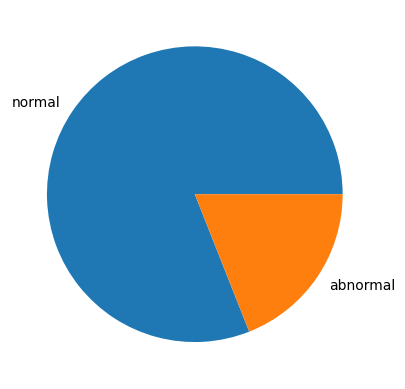

In [55]:
fig, ax = plt.subplots()
ax.pie([target_list.count(1), target_list.count(0)],
      labels=['normal', 'abnormal'])
plt.show()